In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [11]:
class LagrangeProblem(torch.nn.Module):
    def __init__(self,n,f,g,lmbda0=1,device=torch.device('cpu')):
        super(LagrangeProblem, self).__init__()
        '''
        Parameters:
        ---
        n - scalar (1,)
            dimensionality of lagrange multipliers
        '''
        self.f = f
        self.g = g
        self.lmbda = lmbda0*torch.ones((n,), requires_grad=True, device=device)


    def forward(self, x):
        return self.f(x)


    def loss(self,x):
        return self.f(x) - self.lmbda*self.g(x)


    def checknan(self,data,name='data'):
        if torch.isnan(data).any():
            raise ValueError('LagrangeProblem error: nan in %s.'%(name))

In [12]:
def train(model, x0, x_lr, lam_lr, maxitr=0):
    model.train()
    train_loss = 0
    
    x = x0
    xs = []
    lmbdas = []
    for i in range(maxitr):
        
        loss = model.loss(x=x)
        dx, dlmbda = torch.autograd.grad(loss, [x, model.lmbda])
        
        with torch.no_grad():
            x -= x_lr * dx
            model.lmbda += lam_lr * dlmbda
            
        xs.append(torch.clone(x))
        lmbdas.append(model.lmbda.item())
        
    return xs, lmbdas 


def PGD_train(model, x0, x_lr, lam_lr, maxitr=0):
    model.train()
    train_loss = 0
    
    x = x0
    xs = []
    lmbdas = []
    for i in range(maxitr):
        
        loss = model.loss(x=x)
        dx, dlmbda = torch.autograd.grad(loss, [x, model.lmbda])

        
        with torch.no_grad():
            x -= x_lr * dx
            model.lmbda += lam_lr * dlmbda
            
        xs.append(torch.clone(x))
        lmbdas.append(model.lmbda.item())
        
    return xs, lmbdas 

In [13]:
%matplotlib notebook

f = lambda x : torch.square(x[0]) + torch.square(x[1])
g = lambda x : torch.unsqueeze(x[0] - 1,0)

x_lr = 5e-3
lam_lr = 1e-2
model = LagrangeProblem(n=1,f=f,g=g)
x0 = 0.1*torch.ones((2,), requires_grad=True)

xs,lmbdas = train(model=model,x0=x0,x_lr=x_lr,lam_lr=lam_lr,maxitr=1000)
xs_np = np.squeeze(np.asarray([y.detach().numpy() for y in xs]))

<IPython.core.display.Javascript object>


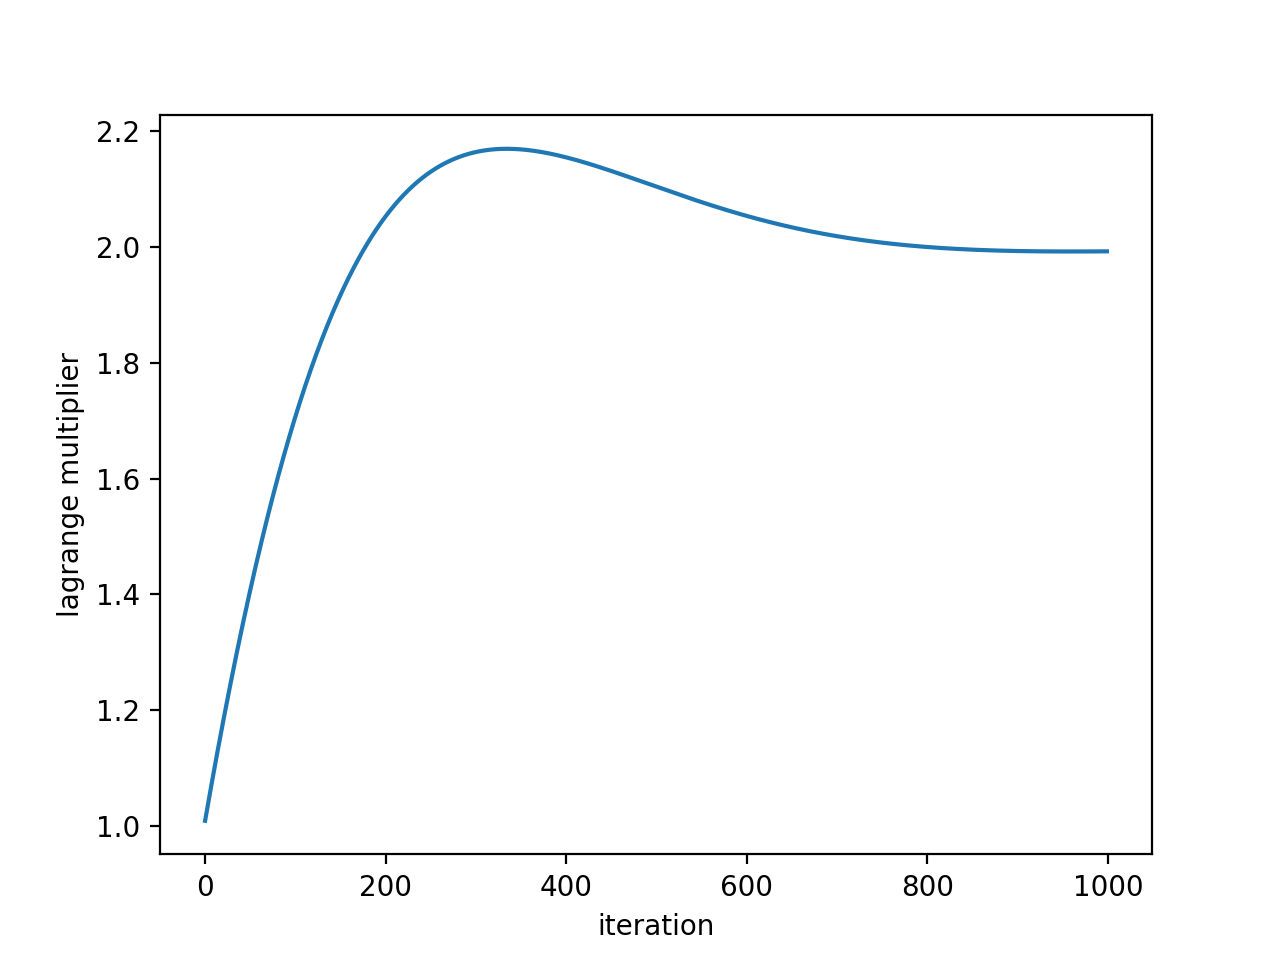

<IPython.core.display.Javascript object>


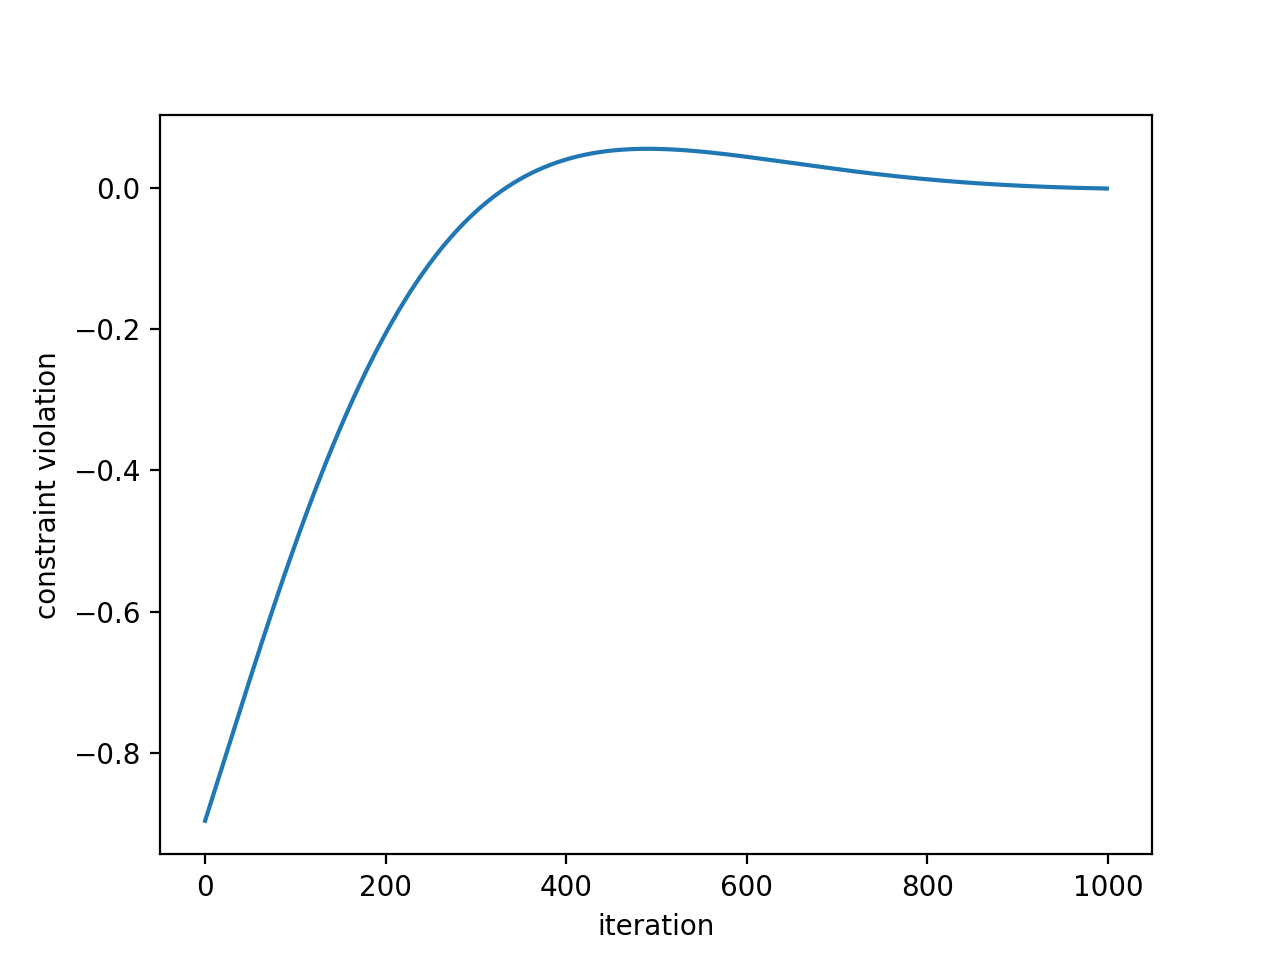

<IPython.core.display.Javascript object>


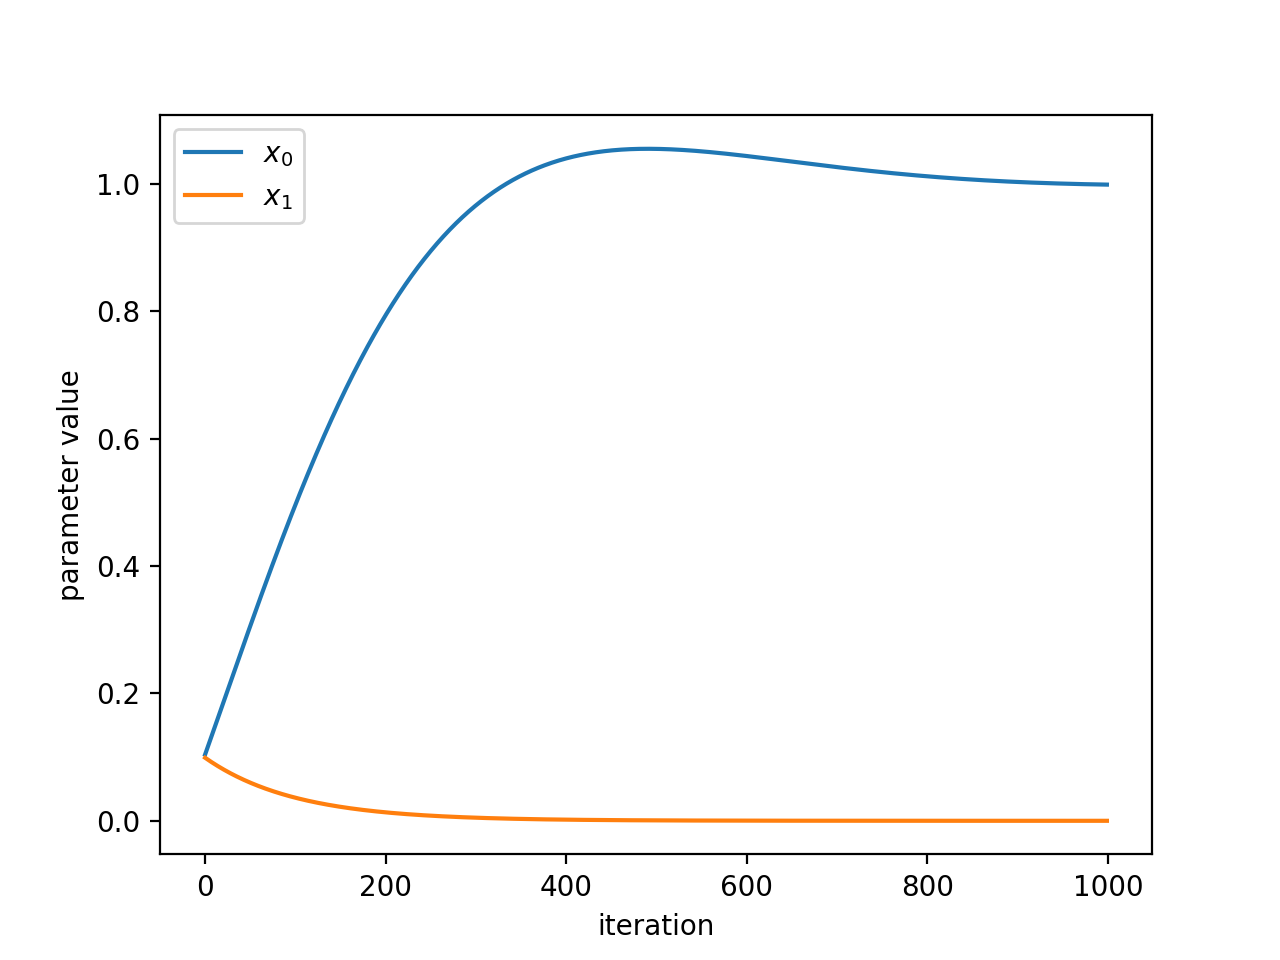

Text(0, 0.5, 'parameter value')

In [14]:
%matplotlib notebook
fig,ax = plt.subplots()

ax.plot(lmbdas)
ax.set_xlabel('iteration')
ax.set_ylabel('lagrange multiplier')


constraint = np.squeeze(np.asarray([g(y).detach().numpy() for y in xs]))
fig,ax = plt.subplots()

ax.plot(constraint)
ax.set_xlabel('iteration')
ax.set_ylabel('constraint violation')


fig,ax = plt.subplots()

ax.plot(xs_np[:,0])
ax.plot(xs_np[:,1])
ax.legend(['$x_0$','$x_1$'])
ax.set_xlabel('iteration')
ax.set_ylabel('parameter value')

In [109]:
%matplotlib notebook

f = lambda x : torch.square(x[0]) + torch.square(x[1]) + torch.square(x[2])
g = lambda x : x[0:1] - 1

x_lr = 5e-3
lam_lr = 1e-2
model = LagrangeProblem(n=2,f=f,g=g)
x0 = 0.1*torch.ones((3,), requires_grad=True)

xs,lmbdas = train(model=model,x0=x0,x_lr=x_lr,lam_lr=lam_lr,maxitr=1000)
xs_np = np.squeeze(np.asarray([y.detach().numpy() for y in xs]))

RuntimeError: grad can be implicitly created only for scalar outputs